In [1]:
import numpy as np
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train_flat, y_train, epochs=10, batch_size=128)
baseline_acc = model.evaluate(X_test_flat, y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

pca = PCA().fit(X_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal n_components: {n_components}")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(n_components,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_pca.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_pca.fit(X_train_pca, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test_pca, y_test))
pca_acc = model_pca.evaluate(X_test_pca, y_test, verbose=0)[1]

print(f"Baseline Accuracy: {baseline_acc[1]:.4f}")
print(f"PCA Accuracy: {pca_acc:.4f}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


c:\Users\itssp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7408 - loss: 0.7563
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8562 - loss: 0.4058
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8694 - loss: 0.3614
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8789 - loss: 0.3323
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8862 - loss: 0.3145
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8940 - loss: 0.2916
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8994 - loss: 0.2729
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9021 - loss: 0.2657
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9020 - loss: 0.2621
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9055 - loss: 0.2515
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8790 - loss: 0.3409
Optimal n_components: 256
Epoch 1/10


c:\Users\itssp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7526 - loss: 0.7278 - val_accuracy: 0.8608 - val_loss: 0.4018
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8857 - loss: 0.3171 - val_accuracy: 0.8713 - val_loss: 0.3596
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9012 - loss: 0.2709 - val_accuracy: 0.8790 - val_loss: 0.3460
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9121 - loss: 0.2407 - val_accuracy: 0.8788 - val_loss: 0.3505
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9230 - loss: 0.2137 - val_accuracy: 0.8838 - val_loss: 0.3515
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9296 - loss: 0.1952 - val_accuracy: 0.8812 - val_loss: 0.3595
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.9377 - loss: 0.1755 - val_accuracy: 0.8850 - val_loss: 0.3637
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.9424 - loss: 0.1607 - val_accuracy:

c:\Users\itssp\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\itssp\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\itssp\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\itssp\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

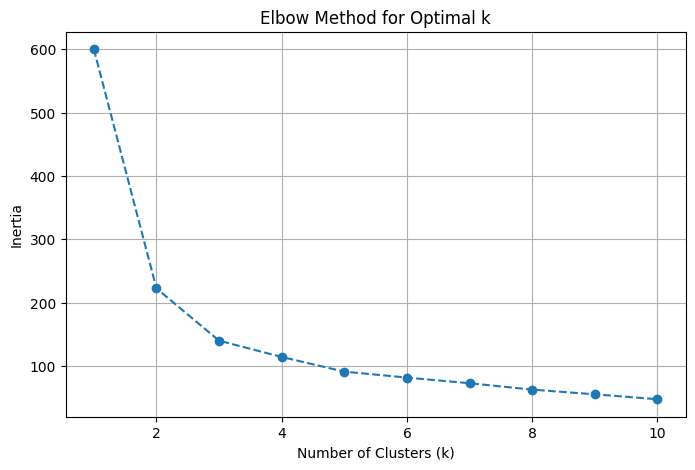

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode

iris = load_iris()
X = iris.data
y_true = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [3]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

def get_cluster_accuracy(y_true, y_kmeans, k):
    labels = np.zeros_like(y_kmeans)
    for i in range(k):
        mask = (y_kmeans == i)
        labels[mask] = mode(y_true[mask])[0]
    return accuracy_score(y_true, labels)

kmeans_accuracy = get_cluster_accuracy(y_true, y_kmeans, optimal_k)

print("Optimal Number of Clusters (k):", optimal_k)
print("K-Means Clustering Accuracy:", kmeans_accuracy)

Optimal Number of Clusters (k): 3
K-Means Clustering Accuracy: 0.8333333333333334
